In [ ]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import re

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
import transformers
from sentence_transformers import SentenceTransformer, util

In [ ]:
model = SentenceTransformer("ai-forever/ru-en-RoSBERTa")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/52.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/715 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.61G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at ai-forever/ru-en-RoSBERTa and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.49M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/5.99M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

In [ ]:
raw_data = pd.read_csv('эмоции32.csv', encoding='windows-1251', sep=';')
raw_data.head(8)

,Название эмоции,Коллокаты из скетчей НКРЯ,"Предсказания YandexGPT Pro 5: Я испытываю эмоцию, которая характеризуется следующими контекстными маркерами.",Каким словом можно назвать эту эмоцию?,Я ребенок. Я испытываю Х.,Я взрослый. Я испытываю Х.,Я женщина. Я испытываю Х.,Я мужчина. Я испытываю Х.,Определение из Викисловаря,Контексты из Викисловаря,Unnamed: 10,Ребенок,Взрослый,Женщина,Мужчина,Лепесток
0,Гнев,"Определения\n1. праведный\n10,36\n2. справедли...","На основе представленных контекстных маркеров,...","На основании представленных маркеров, наиболее...",Поняла. Давай разберемся с твоими чувствами. К...,"Понимаю, что вы испытываете сильные эмоции. Во...","Дорогая, понимаю, что сейчас ты испытываешь си...","Поняла, давай поговорим о том, как справиться ...","чувство сильного, яростного возмущения","? Тогда он постарался представить себе, в как...",NaN,1. Сильный.\n2. Вспыльчивый.\n3. Резкий.\n4. Г...,1. Контролируемый.\n2. Обоснованный.\n3. Накоп...,Вспыльчивый.\nРезкий.\nНеудержимый.\nОбиженный...,1. Яростный.\n2. Свирепый.\n3. Буйный.\n4. Неи...,5.0
1,Изумление,"Определения\n1. неподдельный\n8,53\n2. радостн...","Судя по представленным контекстным маркерам, в...",Наиболее точно эту эмоцию описывает слово “вос...,"Ох, как здорово, что ты испытываешь такое удив...","Изумление - действительно удивительная эмоция,...","Дорогая, ваше изумление - это совершенно естес...","Изумление - это мощная эмоция, которая может п...",крайнее удивление,Инспектор внезапно умолк и в крайнем изумлении...,NaN,Большое.\nНеожиданное.\nСильное.\nРадостное.\n...,1. Неподдельное.\n2. Искреннее.\n3. Наивное.\n...,1. Неожиданное.\n2. Сильное.\n3. Радостное.\n4...,1. Неожиданное.\n2. Сильное.\n3. Глубокое.\n4....,8.0
2,Отвращение,"Определения\n1. непреодолимый\n9,86\n2. инстин...","Судя по представленным контекстным маркерам, в...","Исходя из представленных контекстных маркеров,...","Если ты испытываешь отвращение, важно поговори...","Если вы испытываете отвращение, вот что важно ...","Если вы испытываете отвращение, важно разобрат...","Если вы испытываете отвращение, важно понять е...","крайняя неприязнь, в высшей степени отрицатель...","И с отвращением читая жизнь мою, // Я трепещу...",NaN,Горькое.\nЛипкое.\nТошнотворное.\nПротивное.\n...,1. Неприятное.\n2. Тошнотворное.\n3. Мерзкое.\...,1. Тошнотворное.\n2. Мерзкое.\n3. Гадкое.\n4. ...,1. Тошнотворное.\n2. Мерзкое.\n3. Гадкое.\n4. ...,6.0
3,Ужас,"Определения\n1. панический\n9,67\n2. суеверный...","Судя по представленным контекстным маркерам, в...","Исходя из представленных контекстных маркеров,...","Если ты испытываешь ужас, вот что тебе нужно з...","Если вы испытываете ужас, важно действовать ко...","Если вы испытываете ужас, важно предпринять сл...","Если вы испытываете ужас, важно понимать, что ...","чувство иррационального панического страха, до...","Всех присутствующих охватил ужас, до того нео...",NaN,1. Страшный.\n2. Жуткий.\n3. Кошмарный.\n4. Пу...,1. Невыносимый.\n2. Панический.\n3. Беспросвет...,1. Непередаваемый.\n2. Острый.\n3. Гнетущий.\n...,1. Невыносимый.\n2. Гнетущий.\n3. Острый.\n4. ...,1.0
4,Восхищение,"Определения\n1. нескрываемый\n8,5\n2. неподдел...","На основе представленных контекстных маркеров,...",Исходя из представленных маркеров и характерис...,"Когда ребенок испытывает восхищение, это очень...","Как взрослый человек, испытывающий восхищение,...","Как женщина, испытывающая восхищение, вы может...","Как мужчина, испытывающий восхищение, вы может...","действие по значению гл. восхищаться, ощущение...","Она улыбалась, качала головой и тут же очень к...",NaN,1. Восточное.\n2. Волшебное.\n3. Удивительное....,1. Искреннее.\n2. Глубокое.\n3. Безграничное.\...,1. Восторженное.\n2. Искреннее.\n3. Грандиозно...,1. Искреннее.\n2. Грандиозное.\n3. Глубокое.\n...,2.0
5,Восторг,"Определения\n1. неописанный\n9,17\n2. неописуе...","На основе представленных контекстных маркеров,...","На основе представленных контекстных маркеров,...","Как ребенок, испытывающий восторг, ты можешь з...","К

In [ ]:
print(list(raw_data['Название эмоции'].str.lower()))

['гнев', 'изумление', 'отвращение', 'ужас', 'восхищение', 'восторг', 'горе', 'настороженность', 'доверие', 'печаль', 'ожидание', 'злость', 'неудовольствие', 'радость', 'страх', 'удивление', 'интерес', 'безмятежность', 'принятие', 'тревога', 'растерянность', 'скука', 'досада', 'грусть', 'любовь', 'оптимизм', 'покорность', 'трепет', 'разочарование', 'раскаяние', 'презрение', 'агрессия']


In [ ]:
del raw_data['Unnamed: 10']

In [ ]:
raw_data['Название эмоции'] = raw_data['Название эмоции'].str.lower()
raw_data.iloc[:, :-1] = raw_data.iloc[:, :-1].map(lambda x: x.replace('\n', ' '))

In [ ]:
df = pd.DataFrame()

df['Название эмоции'] = raw_data['Название эмоции']
df['Ребенок'] = raw_data['Ребенок']
df['Взрослый'] = raw_data['Взрослый']
df['Мужчина'] = raw_data['Мужчина']
df['Женщина'] = raw_data['Женщина']

df.head()

,Название эмоции,Ребенок,Взрослый,Мужчина,Женщина
0,гнев,1. Сильный. 2. Вспыльчивый. 3. Резкий. 4. Горя...,1. Контролируемый. 2. Обоснованный. 3. Накопив...,1. Яростный. 2. Свирепый. 3. Буйный. 4. Неисто...,Вспыльчивый. Резкий. Неудержимый. Обиженный. Я...
1,изумление,Большое. Неожиданное. Сильное. Радостное. Удив...,1. Неподдельное. 2. Искреннее. 3. Наивное. 4. ...,1. Неожиданное. 2. Сильное. 3. Глубокое. 4. Шо...,1. Неожиданное. 2. Сильное. 3. Радостное. 4. У...
2,отвращение,Горькое. Липкое. Тошнотворное. Противное. Жутк...,1. Неприятное. 2. Тошнотворное. 3. Мерзкое. 4....,1. Тошнотворное. 2. Мерзкое. 3. Гадкое. 4. Оме...,1. Тошнотворное. 2. Мерзкое. 3. Гадкое. 4. Оме...
3,ужас,1. Страшный. 2. Жуткий. 3. Кошмарный. 4. Пугаю...,1. Невыносимый. 2. Панический. 3. Беспросветны...,1. Невыносимый. 2. Гнетущий. 3. Острый. 4. Бес...,1. Непередаваемый. 2. Острый. 3. Гнетущий. 4. ...
4,восхищение,1. Восточное. 2. Волшебное. 3. Удивительное. 4...,1. Искреннее. 2. Глубокое. 3. Безграничное. 4....,1. Искреннее. 2. Грандиозное. 3. Глубокое. 4. ...,1. Восторженное. 2. Искреннее. 3. Грандиозное....


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+\.', '', text)
    text = re.sub(r'\.', '', text)
    return text

df['Ребенок'] = df['Ребенок'].apply(clean_text)
df['Взрослый'] = df['Взрослый'].apply(clean_text)
df['Мужчина'] = df['Мужчина'].apply(clean_text)
df['Женщина'] = df['Женщина'].apply(clean_text)

df.head()

,Название эмоции,Ребенок,Взрослый,Мужчина,Женщина
0,гнев,сильный вспыльчивый резкий горячий злой ...,контролируемый обоснованный накопившийся с...,яростный свирепый буйный неистовый гневли...,вспыльчивый резкий неудержимый обиженный ярост...
1,изумление,большое неожиданное сильное радостное удивител...,неподдельное искреннее наивное глубокое и...,неожиданное сильное глубокое шокрующее ош...,неожиданное сильное радостное удивляющее ...
2,отвращение,горькое липкое тошнотворное противное жуткий г...,неприятное тошнотворное мерзкое отталкиваю...,тошнотворное мерзкое гадкое омерзительное ...,тошнотворное мерзкое гадкое омерзительное ...
3,ужас,страшный жуткий кошмарный пугающий мрачны...,невыносимый панический беспросветный катас...,невыносимый гнетущий острый беспросветный ...,непередаваемый острый гнетущий беспомощный...
4,восхищение,восточное волшебное удивительное яркое ск...,искреннее глубокое безграничное настоящее ...,искреннее грандиозное глубокое сильное во...,восторженное искреннее грандиозное умилённ...


In [ ]:
# def extract_words(text):
#     clean_text = re.sub(r'\d+\.', '', text)
#     words = re.split(r'\.\s*', clean_text)
#     return [word.strip() for word in words if word.strip()]

# df['Ребенок'] = df['Ребенок'].apply(extract_words)
# df['Взрослый'] = df['Взрослый'].apply(extract_words)
# df['Мужчина'] = df['Мужчина'].apply(extract_words)
# df['Женщина'] = df['Женщина'].apply(extract_words)

# df.head()

In [ ]:
df[df.columns[1]][0]

' сильный  вспыльчивый  резкий  горячий  злой  бурный  яростный  сердитый  нетерпеливый  грозовой'

In [ ]:
embed = pd.DataFrame()

embed['Название эмоции'] = df['Название эмоции']

for i in range(1, 5):
    row = []
    for j in range(32):
      temp = model.encode(df[df.columns[i]][j])
      row.append(temp)
    embed[df.columns[i]] = row

In [ ]:
embed.head()

,Название эмоции,Ребенок,Взрослый,Мужчина,Женщина
0,гнев,"[0.02883324, -0.010286893, 0.0069572204, -0.00...","[0.00856511, 0.0002927707, -0.022421708, -0.01...","[0.040424544, -0.007771018, -0.014787624, -0.0...","[0.008099203, 0.01982599, 0.010337292, -0.0437..."
1,изумление,"[-0.03016691, 0.034411702, 0.042133212, -0.012...","[0.017468918, -0.005775463, 0.027465235, -0.00...","[0.004076992, -0.007707714, 0.054270085, -0.01...","[0.0068070344, -0.00027395537, 0.040182132, 0...."
2,отвращение,"[-0.0013813104, 0.019883405, 0.040464465, -0.0...","[0.033435337, 0.001993944, 0.039890643, 0.0100...","[0.02832345, 0.0038736202, 0.04473347, 0.00272...","[0.030305443, 0.0027541793, 0.041162353, 0.001..."
3,ужас,"[0.0268367, -0.01145238, 0.018426498, 0.014968...","[0.018342987, -0.00075505755, 0.011234786, 0.0...","[-0.00015512339, 0.019759743, 0.022745723, 0.0...","[0.013697333, 0.01462267, 0.02108338, -0.01702..."
4,восхищение,"[0.00458857, 0.009692189, 0.06908896, 0.009579...","[0.025189288, 0.024020387, 0.032506093, -0.007...","[0.022239849, 0.02031115, 0.03074339, -0.01613...","[0.016819913, 0.043921545, 0.015965724, 0.0011..."


In [ ]:
len(embed.iloc[0, 1])

1024

In [ ]:
emotions_names = list(df['Название эмоции'])
personas_names = ['Ребенок', 'Взрослый', 'Мужчина', 'Женщина']

person_id = []
person_name = []
emotion1_name = []
emorion2_name = []
cos = []

for i in range(4):
    for j in range(32):
        for k in range(j+1, 32):
            temp = util.cos_sim(embed.iloc[j, i+1], embed.iloc[k, i+1])
            person_id.append(i)
            person_name.append(personas_names[i])
            emotion1_name.append(emotions_names[j])
            emorion2_name.append(emotions_names[k])
            cos.append(temp[0][0].item())

In [ ]:
data1 = pd.DataFrame()

data1['person_id'] = person_id
data1['person_name'] = person_name
data1['emotion1'] = emotion1_name
data1['emotion2'] = emorion2_name
data1['cos'] = cos

data1

,person_id,person_name,emotion1,emotion2,cos
0,0,Ребенок,гнев,изумление,0.559539
1,0,Ребенок,гнев,отвращение,0.480251
2,0,Ребенок,гнев,ужас,0.712524
3,0,Ребенок,гнев,восхищение,0.615569
4,0,Ребенок,гнев,восторг,0.678856
...,...,...,...,...,...
1979,3,Женщина,разочарование,презрение,0.743977
1980,3,Женщина,разочарование,агрессия,0.556850
1981,3,Женщина,раскаяние,презрение,0.578382
1982,3,Женщина,раскаяние,агрессия,0.478956


In [ ]:
data1[(data1['emotion1'] == 'гнев') & (data1['emotion2'] == 'восторг')]

,person_id,person_name,emotion1,emotion2,cos
4,0,Ребенок,гнев,восторг,0.678856
500,1,Взрослый,гнев,восторг,0.652739
996,2,Мужчина,гнев,восторг,0.648729
1492,3,Женщина,гнев,восторг,0.633035


In [ ]:
data1.to_csv('compare_in_person.csv')

In [ ]:
person1_id = []
person1_name = []
person2_id = []
person2_name = []
emotion_name = []
cos = []

for i in range(4):
    for j in range(i+1, 4):
        for k in range(32):
          temp = util.cos_sim(embed.iloc[k, i+1], embed.iloc[k, j+1])
          person1_id.append(i)
          person1_name.append(personas_names[i])
          person2_id.append(j)
          person2_name.append(personas_names[j])
          emotion_name.append(emotions_names[k])
          cos.append(temp[0][0].item())

In [ ]:
data2 = pd.DataFrame()

data2['person1_id'] = person1_id
data2['person1_name'] = person1_name
data2['person2_id'] = person2_id
data2['person2_name'] = person2_name
data2['emotion'] = emotion_name
data2['cos'] = cos

data2

,person1_id,person1_name,person2_id,person2_name,emotion,cos
0,0,Ребенок,1,Взрослый,гнев,0.745586
1,0,Ребенок,1,Взрослый,изумление,0.720355
2,0,Ребенок,1,Взрослый,отвращение,0.766422
3,0,Ребенок,1,Взрослый,ужас,0.755761
4,0,Ребенок,1,Взрослый,восхищение,0.685774
...,...,...,...,...,...,...
187,2,Мужчина,3,Женщина,трепет,0.951642
188,2,Мужчина,3,Женщина,разочарование,0.997527
189,2,Мужчина,3,Женщина,раскаяние,0.956880
190,2,Мужчина,3,Женщина,презрение,1.000000


In [ ]:
data2.to_csv('compare_in_emotions.csv')

In [ ]:
mask = data2['emotion'] == 'гнев'
data2[mask]

,person1_id,person1_name,person2_id,person2_name,emotion,cos
0,0,Ребенок,1,Взрослый,гнев,0.745586
32,0,Ребенок,2,Мужчина,гнев,0.859214
64,0,Ребенок,3,Женщина,гнев,0.703309
96,1,Взрослый,2,Мужчина,гнев,0.749060
128,1,Взрослый,3,Женщина,гнев,0.753759
160,2,Мужчина,3,Женщина,гнев,0.629355


In [ ]:
from itertools import combinations

persons = [
    {'person_id': 0, 'person_name': 'Ребенок'},
    {'person_id': 1, 'person_name': 'Взрослый'},
    {'person_id': 2, 'person_name': 'Мужчина'},
    {'person_id': 3, 'person_name': 'Женщина'}
]

emotions = emotions_names

# Создаем DataFrame всех (person, emotion)
data = []
for p in persons:
    for e in emotions:
        data.append({
            'person_id': p['person_id'],
            'person_name': p['person_name'],
            'emotion': e
        })

df = pd.DataFrame(data)

# Создаем все уникальные пары без повторений
pairs = list(combinations(df.index, 2))

# Формируем результат
result_rows = []
for i, j in pairs:
    row1 = df.loc[i]
    row2 = df.loc[j]

    idx1 = emotions.index(row1['emotion'])
    idx2 = emotions.index(row2['emotion'])

    vec1 = embed.iloc[idx1][row1['person_name']]
    vec2 = embed.iloc[idx2][row2['person_name']]

    cos_sim_value = util.cos_sim(vec1, vec2).item()

    is_diff_emotion = 1 if row1['emotion'] != row2['emotion'] else 0
    is_diff_person = 1 if row1['person_id'] != row2['person_id'] else 0

    result_rows.append({
        'person1_id': row1['person_id'],
        'person1_name': row1['person_name'],
        'person2_id': row2['person_id'],
        'person2_name': row2['person_name'],
        'emotion1': row1['emotion'],
        'emotion2': row2['emotion'],
        'cos': cos_sim_value,
        'Is_diff_emotion': is_diff_emotion,
        'Is_diff_person': is_diff_person
    })

result_df = pd.DataFrame(result_rows)

print(result_df.shape)  # (8128, 7)
result_df

(8128, 9)


,person1_id,person1_name,person2_id,person2_name,emotion1,emotion2,cos,Is_diff_emotion,Is_diff_person
0,0,Ребенок,0,Ребенок,гнев,изумление,0.559539,1,0
1,0,Ребенок,0,Ребенок,гнев,отвращение,0.480251,1,0
2,0,Ребенок,0,Ребенок,гнев,ужас,0.712524,1,0
3,0,Ребенок,0,Ребенок,гнев,восхищение,0.615569,1,0
4,0,Ребенок,0,Ребенок,гнев,восторг,0.678856,1,0
...,...,...,...,...,...,...,...,...,...
8123,3,Женщина,3,Женщина,разочарование,презрение,0.743977,1,0
8124,3,Женщина,3,Женщина,разочарование,агрессия,0.556850,1,0
8125,3,Женщина,3,Женщина,раскаяние,презрение,0.578382,1,0
8126,3,Женщина,3,Женщина,раскаяние,агрессия,0.478956,1,0


In [ ]:
result_df.to_csv('compare.csv')

In [ ]:
result_df = pd.read_csv('compare.csv')

In [ ]:
# 1. Межперсональные значения (вне диагонали)
df_diff_person = result_df[result_df['Is_diff_person'] == 1].copy()
df_diff_person['person_pair'] = df_diff_person.apply(
    lambda row: tuple(sorted([row['person1_name'], row['person2_name']])), axis=1
)

agg_offdiag = df_diff_person.groupby('person_pair')['cos'].mean().reset_index()
agg_offdiag[['person1', 'person2']] = pd.DataFrame(agg_offdiag['person_pair'].tolist(), index=agg_offdiag.index)
agg_offdiag = agg_offdiag[['person1', 'person2', 'cos']]
agg_offdiag.columns = ['person1', 'person2', 'mean_CS']

# 2. Внутриперсональные значения (диагональ)
df_same_person = result_df[result_df['Is_diff_person'] == 0].copy()
agg_diag = df_same_person.groupby('person1_name')['cos'].mean().reset_index()
agg_diag['person2'] = agg_diag['person1_name']
agg_diag = agg_diag[['person1_name', 'person2', 'cos']]
agg_diag.columns = ['person1', 'person2', 'mean_CS']

# 3. Объединяем всё
agg_all = pd.concat([agg_offdiag, agg_diag], ignore_index=True)

# 4. Строим симметричную матрицу 4×4
desired_order = ["Ребенок", "Взрослый", "Мужчина", "Женщина"]
matrix = agg_all.pivot(index='person1', columns='person2', values='mean_CS')
matrix_full = matrix.combine_first(matrix.T)
matrix_full = matrix_full.loc[desired_order, desired_order]

print(matrix_full.round(3))


          Ребенок  Взрослый  Мужчина  Женщина
person1                                      
Ребенок     0.653     0.632    0.628    0.621
Взрослый    0.632     0.632    0.636    0.624
Мужчина     0.628     0.636    0.621    0.618
Женщина     0.621     0.624    0.618    0.607


In [ ]:
# Проверка стандартного отклонения по всем косинусным схожестям между персонами
print(result_df.groupby(['person1_name', 'person2_name'])['cos'].agg(['mean', 'std']).sort_values('std').round(3))


                            mean    std
person1_name person2_name              
Взрослый     Взрослый      0.632  0.083
Женщина      Женщина       0.607  0.085
Мужчина      Мужчина       0.621  0.086
Ребенок      Взрослый      0.632  0.093
             Мужчина       0.628  0.097
             Ребенок       0.653  0.098
             Женщина       0.621  0.099
Взрослый     Женщина       0.624  0.100
             Мужчина       0.636  0.101
Мужчина      Женщина       0.618  0.102


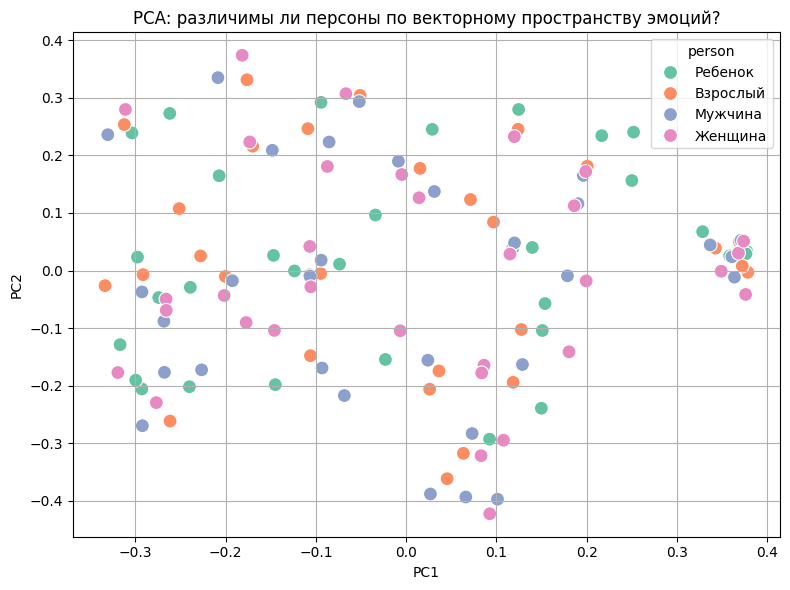

In [ ]:
import torch
from sklearn.decomposition import PCA

# Сбор всех векторов и меток в один датафрейм
rows = []
for person in embed.columns[1:]:
    for idx in embed.index:
        vec = embed.loc[idx, person]
        if isinstance(vec, torch.Tensor):
            vec = vec.numpy()
            print(vec, idx,person)
        rows.append({
            'person': person,
            'emotion': idx,
            'vec': vec
        })

df_pca = pd.DataFrame(rows)

# Преобразуем список векторов в матрицу признаков
X = np.stack(df_pca['vec'].values)
pca = PCA(n_components=2)
components = pca.fit_transform(X)

# Добавляем компоненты в датафрейм
df_pca['pc1'] = components[:, 0]
df_pca['pc2'] = components[:, 1]

# Визуализация
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='pc1', y='pc2', hue='person', s=100, palette='Set2')
plt.title("PCA: различимы ли персоны по векторному пространству эмоций?")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
  def extract_gender(name):
      if name == 'Мужчина':
          return 'Male'
      elif name == 'Женщина':
          return 'Female'
      else:
          return np.nan

  def extract_age(name):
      if name == 'Ребенок':
          return 'Child'
      elif name == 'Взрослый':
          return 'Adult'
      else:
          return np.nan

  test_persons = result_df.copy()

  test_persons['person1_gender'] = test_persons['person1_name'].apply(extract_gender)
  test_persons['person2_gender'] = test_persons['person2_name'].apply(extract_gender)

  test_persons['person1_age'] = test_persons['person1_name'].apply(extract_age)
  test_persons['person2_age'] = test_persons['person2_name'].apply(extract_age)

  # Создаем признаки различий
  test_persons['Is_diff_gender'] = np.where(
      test_persons[['person1_gender', 'person2_gender']].notna().all(axis=1),
      test_persons['person1_gender'] != test_persons['person2_gender'],
      np.nan
  )

  test_persons['Is_diff_age_group'] = np.where(
      test_persons[['person1_age', 'person2_age']].notna().all(axis=1),
      test_persons['person1_age'] != test_persons['person2_age'],
      np.nan
  )

  test_persons

,Unnamed: 0,person1_id,person1_name,person2_id,person2_name,emotion1,emotion2,cos,Is_diff_emotion,Is_diff_person,person1_gender,person2_gender,person1_age,person2_age,Is_diff_gender,Is_diff_age_group
0,0,0,Ребенок,0,Ребенок,гнев,изумление,0.559539,1,0,NaN,NaN,Child,Child,NaN,0.0
1,1,0,Ребенок,0,Ребенок,гнев,отвращение,0.480251,1,0,NaN,NaN,Child,Child,NaN,0.0
2,2,0,Ребенок,0,Ребенок,гнев,ужас,0.712524,1,0,NaN,NaN,Child,Child,NaN,0.0
3,3,0,Ребенок,0,Ребенок,гнев,восхищение,0.615569,1,0,NaN,NaN,Child,Child,NaN,0.0
4,4,0,Ребенок,0,Ребенок,гнев,восторг,0.678856,1,0,NaN,NaN,Child,Child,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,8123,3,Женщина,3,Женщина,разочарование,презрение,0.743977,1,0,Female,Female,NaN,NaN,0.0,NaN
8124,8124,3,Женщина,3,Женщина,разочарование,агрессия,0.556850,1,0,Female,Female,NaN,NaN,0.0,NaN
8125,8125,3,Женщина,3,Женщина,раскаяние,презрение,0.578382,1,0,Female,Female,NaN,NaN,0.0,NaN
8126,8126,3,Женщина,3,Женщина,раскаяние,агрессия,0.478956,1,0,Female,Female,NaN,NaN,0.0,NaN


In [ ]:
def comparable_groups(row):
    # Возвращаем True, если обе из возрастных групп (Child, Adult) или обе из гендерных (Male, Female)
    age_groups = ['Ребенок', 'Взрослый']
    gender_groups = ['Мужчина', 'Женщина']

    p1 = row['person1_name']
    p2 = row['person2_name']

    # Если обе в возрастных — ок
    if (p1 in age_groups) and (p2 in age_groups):
        return True
    # Если обе в гендерных — ок
    if (p1 in gender_groups) and (p2 in gender_groups):
        return True

    # Иначе — разные типы, не сравниваем
    return False

result_df_filtered = test_persons[test_persons.apply(comparable_groups, axis=1)].copy()

In [ ]:
result_df_filtered

,Unnamed: 0,person1_id,person1_name,person2_id,person2_name,emotion1,emotion2,cos,Is_diff_emotion,Is_diff_person,person1_gender,person2_gender,person1_age,person2_age,Is_diff_gender,Is_diff_age_group
0,0,0,Ребенок,0,Ребенок,гнев,изумление,0.559539,1,0,NaN,NaN,Child,Child,NaN,0.0
1,1,0,Ребенок,0,Ребенок,гнев,отвращение,0.480251,1,0,NaN,NaN,Child,Child,NaN,0.0
2,2,0,Ребенок,0,Ребенок,гнев,ужас,0.712524,1,0,NaN,NaN,Child,Child,NaN,0.0
3,3,0,Ребенок,0,Ребенок,гнев,восхищение,0.615569,1,0,NaN,NaN,Child,Child,NaN,0.0
4,4,0,Ребенок,0,Ребенок,гнев,восторг,0.678856,1,0,NaN,NaN,Child,Child,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,8123,3,Женщина,3,Женщина,разочарование,презрение,0.743977,1,0,Female,Female,NaN,NaN,0.0,NaN
8124,8124,3,Женщина,3,Женщина,разочарование,агрессия,0.556850,1,0,Female,Female,NaN,NaN,0.0,NaN
8125,8125,3,Женщина,3,Женщина,раскаяние,презрение,0.578382,1,0,Female,Female,NaN,NaN,0.0,NaN
8126,8126,3,Женщина,3,Женщина,раскаяние,агрессия,0.478956,1,0,Female,Female,NaN,NaN,0.0,NaN


In [ ]:
# Межперсональные значения (вне диагонали)
df_diff_person = result_df_filtered[result_df_filtered['Is_diff_person'] == 1].copy()
df_diff_person['person_pair'] = df_diff_person.apply(
    lambda row: tuple(sorted([row['person1_name'], row['person2_name']])), axis=1
)

agg_offdiag = df_diff_person.groupby('person_pair')['cos'].mean().reset_index()
agg_offdiag[['person1', 'person2']] = pd.DataFrame(agg_offdiag['person_pair'].tolist(), index=agg_offdiag.index)
agg_offdiag = agg_offdiag[['person1', 'person2', 'cos']]
agg_offdiag.columns = ['person1', 'person2', 'mean_CS']

# Внутриперсональные значения (диагональ)
df_same_person = result_df_filtered[result_df_filtered['Is_diff_person'] == 0].copy()
agg_diag = df_same_person.groupby('person1_name')['cos'].mean().reset_index()
agg_diag['person2'] = agg_diag['person1_name']
agg_diag = agg_diag[['person1_name', 'person2', 'cos']]
agg_diag.columns = ['person1', 'person2', 'mean_CS']

# Объединяем всё
agg_all = pd.concat([agg_offdiag, agg_diag], ignore_index=True)

# Строим симметричную матрицу для нужного порядка групп
desired_order = ["Ребенок", "Взрослый", "Мужчина", "Женщина"]
matrix = agg_all.pivot(index='person1', columns='person2', values='mean_CS')
matrix_full = matrix.combine_first(matrix.T)
matrix_full = matrix_full.loc[desired_order, desired_order]

print(matrix_full.round(3))


          Ребенок  Взрослый  Мужчина  Женщина
person1                                      
Ребенок     0.653     0.632      NaN      NaN
Взрослый    0.632     0.632      NaN      NaN
Мужчина       NaN       NaN    0.621    0.618
Женщина       NaN       NaN    0.618    0.607


In [ ]:
# Проверка стандартного отклонения по всем косинусным схожестям между персонами
print(result_df_filtered.groupby(['person1_name', 'person2_name'])['cos'].agg(['mean', 'std']).sort_values('std').round(3))

                            mean    std
person1_name person2_name              
Взрослый     Взрослый      0.632  0.083
Женщина      Женщина       0.607  0.085
Мужчина      Мужчина       0.621  0.086
Ребенок      Взрослый      0.632  0.093
             Ребенок       0.653  0.098
Мужчина      Женщина       0.618  0.102


In [ ]:
# однофакторная ANOVA: Is_diff_emotion
model_emotion = ols('cos ~ C(Is_diff_emotion)', data=result_df_filtered).fit()
anova_emotion = sm.stats.anova_lm(model_emotion, typ=2)
print(anova_emotion)

                       sum_sq      df           F         PR(>F)
C(Is_diff_emotion)   3.940352     1.0  503.231908  4.012334e-105
Residual            31.555269  4030.0         NaN            NaN


In [ ]:
test_persons.groupby('Is_diff_emotion')['cos'].describe()

,count,mean,std,min,25%,50%,75%,max
Is_diff_emotion,,,,,,,,
0,192.0,0.881408,0.094832,0.600709,0.831669,0.884641,0.95850,1.000000
1,7936.0,0.620767,0.088061,0.370058,0.562067,0.615987,0.67094,0.975965


In [ ]:
# однофакторная ANOVA: Is_diff_gender
model_gender = ols('cos ~ C(Is_diff_gender)', data=result_df_filtered).fit()
anova_gender = sm.stats.anova_lm(model_gender, typ=2)
print(anova_gender)

                     sum_sq      df      F    PR(>F)
C(Is_diff_gender)   0.00848     1.0  0.958  0.327809
Residual           17.82674  2014.0    NaN       NaN


In [ ]:
# однофакторная ANOVA: Is_diff_age_group
model_age_group = ols('cos ~ C(Is_diff_age_group)', data=result_df_filtered).fit()
anova_age_group = sm.stats.anova_lm(model_age_group, typ=2)
print(anova_age_group)

                         sum_sq      df        F   PR(>F)
C(Is_diff_age_group)   0.054878     1.0  6.44364  0.01121
Residual              17.152550  2014.0      NaN      NaN


In [ ]:
# матрица кос сходства для эмоций

In [ ]:
# Межэмоциональные значения (вне диагонали)
df_diff_emotion = result_df_filtered[result_df_filtered['Is_diff_emotion'] == 1].copy()

# Создаем пары эмоций в сортированном виде, чтобы не было дубликатов в обратном порядке
df_diff_emotion['emotion_pair'] = df_diff_emotion.apply(
    lambda row: tuple(sorted([row['emotion1'], row['emotion2']])), axis=1
)

# Усредняем косинусные сходства по парам эмоций
agg_offdiag_emotion = df_diff_emotion.groupby('emotion_pair')['cos'].mean().reset_index()

# Распаковываем кортежи пар в отдельные колонки
agg_offdiag_emotion[['emotion1', 'emotion2']] = pd.DataFrame(agg_offdiag_emotion['emotion_pair'].tolist(), index=agg_offdiag_emotion.index)
agg_offdiag_emotion = agg_offdiag_emotion[['emotion1', 'emotion2', 'cos']]
agg_offdiag_emotion.columns = ['emotion1', 'emotion2', 'mean_CS']

# Внутремоциональные значения (диагональ)
df_same_emotion = result_df_filtered[result_df_filtered['Is_diff_emotion'] == 0].copy()

agg_diag_emotion = df_same_emotion.groupby('emotion1')['cos'].mean().reset_index()
agg_diag_emotion['emotion2'] = agg_diag_emotion['emotion1']
agg_diag_emotion = agg_diag_emotion[['emotion1', 'emotion2', 'cos']]
agg_diag_emotion.columns = ['emotion1', 'emotion2', 'mean_CS']

# Объединяем всё
agg_all_emotion = pd.concat([agg_offdiag_emotion, agg_diag_emotion], ignore_index=True)

# Задаем порядок эмоций, например:
desired_order_emotions = ['гнев', 'изумление', 'отвращение', 'ужас', 'восхищение', 'восторг', 'горе', 'настороженность']  # замени на свои эмоции

# Строим симметричную матрицу
matrix_emotion = agg_all_emotion.pivot(index='emotion1', columns='emotion2', values='mean_CS')
matrix_emotion_full = matrix_emotion.combine_first(matrix_emotion.T)
matrix_emotion_full = matrix_emotion_full.loc[desired_order_emotions, desired_order_emotions]

print(matrix_emotion_full.round(3))


                  гнев  изумление  отвращение   ужас  восхищение  восторг  \
emotion1                                                                    
гнев             0.687      0.574       0.526  0.641       0.584    0.616   
изумление        0.574      0.834       0.574  0.618       0.768    0.696   
отвращение       0.526      0.574       0.881  0.598       0.554    0.482   
ужас             0.641      0.618       0.598  0.807       0.612    0.664   
восхищение       0.584      0.768       0.554  0.612       0.793    0.740   
восторг          0.616      0.696       0.482  0.664       0.740    0.770   
горе             0.603      0.633       0.628  0.722       0.667    0.594   
настороженность  0.541      0.557       0.586  0.551       0.608    0.494   

                  горе  настороженность  
emotion1                                 
гнев             0.603            0.541  
изумление        0.633            0.557  
отвращение       0.628            0.586  
ужас             0.

In [ ]:
# Межэмоциональные значения (вне диагонали)
df_diff_emotion = result_df_filtered[result_df_filtered['Is_diff_emotion'] == 1].copy()
df_diff_emotion['emotion_pair'] = df_diff_emotion.apply(
    lambda row: tuple(sorted([row['emotion1'], row['emotion2']])), axis=1
)

# Рассчитаем среднее и std для межэмоциональных пар
agg_offdiag_emotion_stats = df_diff_emotion.groupby('emotion_pair')['cos'].agg(['mean', 'std']).reset_index()

# Распаковываем пары в отдельные колонки
agg_offdiag_emotion_stats[['emotion1', 'emotion2']] = pd.DataFrame(agg_offdiag_emotion_stats['emotion_pair'].tolist(), index=agg_offdiag_emotion_stats.index)

# Внутремоциональные значения (диагональ)
df_same_emotion = result_df_filtered[result_df_filtered['Is_diff_emotion'] == 0].copy()
agg_diag_emotion_stats = df_same_emotion.groupby('emotion1')['cos'].agg(['mean', 'std']).reset_index()
agg_diag_emotion_stats['emotion2'] = agg_diag_emotion_stats['emotion1']

# Объединяем
agg_diag_emotion_stats = agg_diag_emotion_stats[['emotion1', 'emotion2', 'mean', 'std']]
agg_offdiag_emotion_stats = agg_offdiag_emotion_stats[['emotion1', 'emotion2', 'mean', 'std']]

agg_all_emotion_stats = pd.concat([agg_offdiag_emotion_stats, agg_diag_emotion_stats], ignore_index=True)

# Пивотируем средние и std в две матрицы
mean_matrix = agg_all_emotion_stats.pivot(index='emotion1', columns='emotion2', values='mean')
std_matrix = agg_all_emotion_stats.pivot(index='emotion1', columns='emotion2', values='std')

# Заполняем симметричные пропуски
mean_matrix_full = mean_matrix.combine_first(mean_matrix.T)
std_matrix_full = std_matrix.combine_first(std_matrix.T)

# Упорядочим по желаемому списку эмоций
desired_order_emotions = ['гнев', 'изумление', 'отвращение', 'ужас', 'восхищение', 'восторг', 'горе', 'настороженность']

mean_matrix_full = mean_matrix_full.loc[desired_order_emotions, desired_order_emotions]
std_matrix_full = std_matrix_full.loc[desired_order_emotions, desired_order_emotions]

print("Средние косинусные сходства:\n", mean_matrix_full.round(3))
print("\nСтандартные отклонения:\n", std_matrix_full.round(3))


Средние косинусные сходства:
                   гнев  изумление  отвращение   ужас  восхищение  восторг  \
emotion1                                                                    
гнев             0.687      0.574       0.526  0.641       0.584    0.616   
изумление        0.574      0.834       0.574  0.618       0.768    0.696   
отвращение       0.526      0.574       0.881  0.598       0.554    0.482   
ужас             0.641      0.618       0.598  0.807       0.612    0.664   
восхищение       0.584      0.768       0.554  0.612       0.793    0.740   
восторг          0.616      0.696       0.482  0.664       0.740    0.770   
горе             0.603      0.633       0.628  0.722       0.667    0.594   
настороженность  0.541      0.557       0.586  0.551       0.608    0.494   

                  горе  настороженность  
emotion1                                 
гнев             0.603            0.541  
изумление        0.633            0.557  
отвращение       0.628         